In [1]:
%matplotlib notebook
from arc import *
from numpy import *
from basics import *
import matplotlib.pyplot as plt
#from numpy import *
from scipy import integrate

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

tau = 2*pi

In [2]:
def err_doppler(tpi,T,dk):
    exp_arg = (kb*T*(dk*tpi)**2)/(2*mcs)
    return (1+exp(-exp_arg))/2

<IPython.core.display.Javascript object>


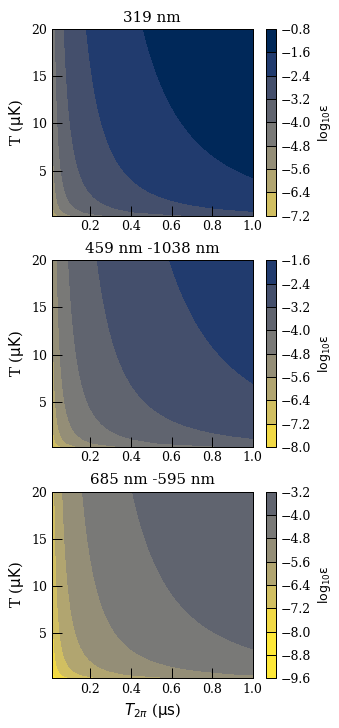

In [8]:
dKs = {
    "319 nm": tau/319e-9,
    "459 nm -1038 nm": tau*(1/459-9-1/1038e-9),
    "685 nm -595 nm": tau*(1/595e-9-1/685e-9)
}

tpis = linspace(0.01e-6,1e-6,1000)
Temps = linspace(0.2e-6,20e-6)

omap = plt.cm.get_cmap('cividis')
cmap = omap.reversed()

i=0
fig,axar=plt.subplots(3,1,figsize=(4.2,3*3))
for name, dK in dKs.items():
    ax = axar[i]
    X,Y = meshgrid(tpis,Temps)
    Z = err_doppler(X,Y,dK)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.15)

    
    cp = ax.contourf(X*1e6,Y*1e6,log(1-Z)/log(10),cmap=cmap,vmin=-8.0,vmax = -1.0)
    cb = fig.colorbar(cp,cax=cax)
    cb.ax.minorticks_off()
    cb.ax.set_ylabel("$\\rm log_{10}\epsilon$")
    ax.set_title(name)
    i+=1
ax.set_xlabel("$T_{2\pi}$ ($\\rm \mu s$)")
for ax in axar:
    ax.set_ylabel("T ($\\rm \mu K$)")
    ax.minorticks_off()
    ax.tick_params('both', top=False,right=False)
    ax_fontsize=12
    for item in [ax.xaxis.label, ax.yaxis.label, ax.title]:
        item.set_fontsize(ax_fontsize)
fig.tight_layout()
fig.savefig(r"C:\Users\Hybrid\Pictures\For wiki\DAMOP2023" + f"\\DopplerContour.png")
fig.show()

In [17]:
atom=Cesium()
atom.getStateLifetime(52,1,3/2,temperature=4,includeLevelsUpTo=56)*1e6

353.6031156342701

In [2]:
# wiki Ryddberg Resonances (THz)

res = {
    "52P1/2": 940.134298,
    "52P3/2": 940.136182,
    "51D3/2": 940.141010,
    "51D5/2": 940.141544
}

print((res["51D5/2"]-res["51D3/2"])*1e6)

533.9999999023348


In [6]:
O1m = tau*17e6
O2m = tau*11e6
D = tau*80e6
Orm = O1m*O2m/D

w1 = 14e-6
z1 = pi*w1**2/684e-9
w2 = 5e-6
z2 = pi*w2**2/595e09

wF = 3e-6
zF = pi*wF**2/938e-9

T = 20e-6  # K
U0 = 600e-6  # K

sigX = wF*sqrt(T/U0)
sigZ = zF*sqrt(T/U0)

In [10]:
P = lambda x,y,z : exp((x**2+y**2)/2/sigX**2)*exp(z**2/2/sigZ**2)/(sigX*sqrt(sigZ)*tau**3/2)

In [34]:
Lz = lambda z,zr: 1/(1+(z/zr)**2)
Or = lambda x,y,z,x0,y0,z0: Orm*exp(-2*(x**2+y**2)*Lz(z,z1)/w1**2)*exp(-2*((x-x0)**2+(y-y0)**2)*Lz(z-z0,z2)/w2**2)*Lz(z,z1)*Lz(z-z0,z2)

Pg = lambda t,O,d: O**2/(O**2+d**2)*cos(sqrt(O**2+d**2)*t/2)

In [35]:
tpi = pi/Orm
normx = 1/(sigX*sqrt(tau))

ts = linspace(0,10*tpi,1000)
Xs = linspace(-5*sigX,5*sigX,1000)
dX = Xs[1]-Xs[0]
Zs = linspace(-5*sigZ,5*sigZ,1000)

PGx = lambda t,x0: normx*trapz(exp(-Xs**2/2/sigX**2)*cos(Orm*t/2*exp(-2*(Xs-x0)**2/w2**2))**2,dx=dX)

<IPython.core.display.Javascript object>


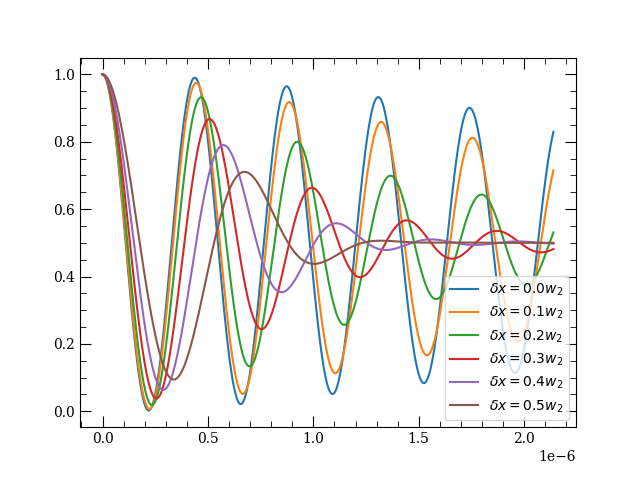

In [36]:
fig,ax = plt.subplots(1,1)
for x0 in arange(0,0.6,0.1):
    PGxs = [PGx(t,x0*w2) for t in ts]
    ax.plot(ts,PGxs,label=f"$\delta x = {x0:.1f}w_2$")
ax.legend()
fig.show()

In [41]:
fun_g3 = lambda x,y,t,x0,y0: Pg(t,Or(x,y,0,x0,y0,0),0)*P(x,y,0)

Pg3 = lambda t,x0 : integrate.nquad(fun_g3,[(-5*sigX,5*sigX),(-5*sigX,5*sigX)],args=[t,x0,0])

In [42]:
fig,ax = plt.subplots(1,1)
dx0 = 0
Pg3s = zeros(len(ts),dtype=float)
for i,t in enumerate(ts):
    res = Pg3(t,dx0)
    Pg3s[i] = res[0]
    print(res)
ax.plot(ts,Pg3s)
fig.show()

<IPython.core.display.Javascript object>

(23739.519266285195, 23.843373365234584)
(23739.269542748556, 23.84340353915468)
(23738.520377575802, 23.843481121584773)
(23737.271787078273, 23.84360126964748)
(23735.523798441103, 23.843788920901716)
(23733.27644972264, 23.844028314575553)
(23730.529789853572, 23.844314308837056)
(23727.28387863576, 23.844652666244656)
(23723.538786740915, 23.8450414580293)
(23719.29459570902, 23.845481161493808)
(23714.551397946383, 23.8459850163199)
(23709.30929672363, 23.846530781593174)
(23703.568406173254, 23.847136709373444)
(23697.328851287086, 23.847790248226374)
(23690.59076791341, 23.84850238636136)
(23683.354302753898, 23.84925790457055)
(23675.61961336022, 23.850067977793515)
(23667.386868130478, 23.85093300230801)
(23658.65624630535, 23.851858391426504)
(23649.427937964043, 23.85283139254898)
(23639.702144019935, 23.85385354887694)
(23629.479076215954, 23.85493092983961)
(23618.75895711983, 23.856069413013756)
(23607.54202011897, 23.857248683460057)
(23595.828509415132, 23.8584953695535

(14107.346486216673, 25.555053812917322)
(14019.988134501122, 25.58039975212887)
(13932.34119739053, 25.606105329934508)
(13844.407568888977, 25.632172369863838)
(13756.189149050153, 25.65860818279907)
(13667.687843934491, 25.685414941981435)
(13578.905565566209, 25.71259790379554)
(13489.844231890242, 25.740171892102808)
(13400.505766728973, 25.768136312253773)
(13310.892099738921, 25.796505131293088)
(13221.005166367262, 25.825274726375937)
(13130.846907808196, 25.854464548639953)
(13040.419270959248, 25.884068590588868)
(12949.724208377409, 25.91410283651203)
(12858.763678235173, 25.944577292073518)
(12767.53964427643, 25.975494179408997)
(12676.054075772267, 26.00686779106036)
(12584.308947476598, 26.038692084606737)
(12492.306239581792, 26.070995699148625)
(12400.047937674013, 26.103772338479757)
(12307.536032688613, 26.137038657907397)
(12214.772520865276, 26.17079312261194)
(12121.75940370315, 26.20506253745407)
(12028.498687915795, 26.239842223469168)
(11934.992385386053, 26.27

KeyboardInterrupt: 

In [40]:
sigZ

5.50337258911613e-06

In [4]:
class RydStateFS:
    """
    Tiny wrapper class to hold quantum numbers of rydberg state in FS basis
    
    """
    def __init__(self, n, l, j,**kwargs):
        """
        Args:
            n : principle quantum number (int)
            l : orbital angular momentum quantum number (int)
            j : FS angular momentum quantum number (int/half int)
        kwargs:
            for additional desired quantum numbers
        """
        self.n = n
        self.l = l
        self.j = j
        self.__qn = {"n": n, "l": l, "j": j}
        self.__qn.update(kwargs)
        if "atom" in kwargs.keys():
            self.atom_name = kwargs["atom"]
        else:
            self.atom_name = "Cesium"
        self.atom = eval(f"{self.atom_name}()")
    def __getitem__(self,arg):
        return self.__qn[arg]
    def quantum_numbers(self):
        return self.__qn
    def get_energy(self):
        return self.atom.getEnergy(self.n,self.l,self.j)
    def __repr__(self):
        return f"RydStateFS({','.join([f'{key}={value}' for key,value in self.__qn.items()])})"
    def ket(self):
        L_labels = {0: "S", 1: "P", 2: "D",3:"F"}
        return f"|{self.n},{L_labels[self.l]},{int(2*self.j)}/2>"


def detuning(state1: RydStateFS, state2: RydStateFS, field_nu: float):
    """
    Returns detuning of field from bare resonance between state1 and state2
    Args:
        state1: Rydberg state in FS basis for the first state
        state2: Rydberg state in FS basis for the second state
        field_nu: radial frequency of a single tone field coupling state1 and state2 (Hz)
    Returns:
        detuning : field detuning from bare resonance in Hz (radial frequency)
    """
    bare_res = (state1.get_energy()-state2.get_energy())*e/h
    return bare_res - field_nu
def states_sgn(state1: RydStateFS, state2: RydStateFS):
    return -np.sign(state1.get_energy()-state2.get_energy())

tau = 2*pi

In [5]:
e

1.6021766208e-19

<IPython.core.display.Javascript object>


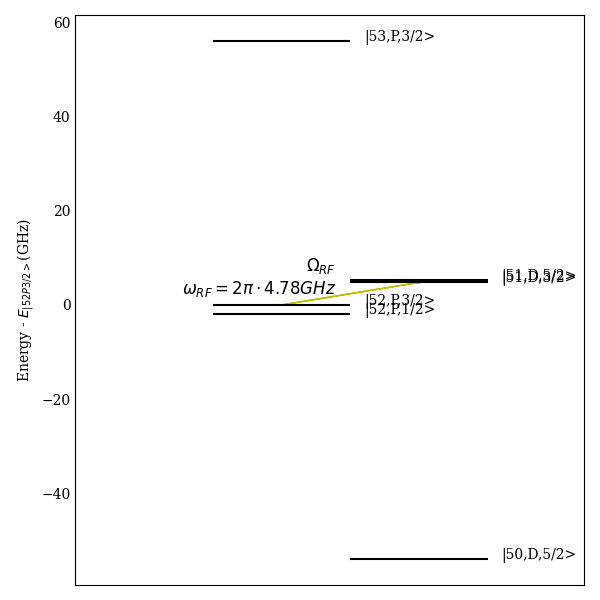

In [6]:
states = [
    RydStateFS(52,1,3/2),
    RydStateFS(52,1,1/2),
    RydStateFS(51,2,3/2),
    RydStateFS(51,2,5/2),
    RydStateFS(50,2,5/2),
    RydStateFS(53,1,3/2),
#    RydStateFS(50,2,3/2),
#    RydStateFS(50,2,5/2),
#    RydStateFS(50,3,5/2),
#    RydStateFS(50,3,7/2),
#    RydStateFS(49,3,5/2),
#    RydStateFS(49,3,7/2),
#    RydStateFS(48,3,5/2),
#    RydStateFS(48,3,7/2),
#    RydStateFS(52,0,1/2),
#    RydStateFS(53,0,1/2),
#    RydStateFS(52,2,3/2),
#    RydStateFS(52,2,5/2),
#    RydStateFS(50,2,3/2),
#    RydStateFS(50,2,5/2)
]
t_state = RydStateFS(52,1,3/2)
e_state = RydStateFS(51,1,3/2)
field_nu = 4.780# + 0.050 + 0.250  #GHz

energies = [detuning(state,t_state,0)*1e-9 for state in states]
fig, ax = plt.subplots(1,1,figsize=(6,6))
for state, energy in zip(states, energies):
    spacing=1
    ax.hlines([energy],state.l*spacing,(state.l+1)*spacing, label=state.ket(),colors='k')
    ax.annotate(state.ket(), ((state.l+1)*spacing, energy), textcoords="offset points", xytext=(10,0),ha='left')
# add an arrow    
ax.arrow((t_state.l+1/2)*spacing,0,spacing, field_nu,length_includes_head=True, shape='full',width=0.01, head_width=0.05,color='y')
#ax.arrow((t_state.l+1/2)*spacing,-detuning(t_state,RydStateFS(52,1,1/2),0)*1e-9,spacing, field_nu,length_includes_head=True, shape='full',width=0.01, head_width=0.05,color='y')
ax.annotate(f"$\Omega_{{RF}}$\n$\omega_{{RF}}=2\pi \cdot {field_nu} GHz$", ((t_state.l+1)*spacing,field_nu/2), textcoords="offset points", xytext=(-10,0),ha="right",fontweight="heavy",fontsize="large")
ax.set_ylabel("Energy - $E_{|52P3/2>}$(GHz)")
ax.set_xlim(0,(max([state.l for state in states])+1.7)*spacing)
ax.tick_params(which="both",bottom=False,top=False,left=False,right=False,labelbottom=False)
fig.tight_layout()
fig.show()
fig.savefig("RF Grotrian-PsandDs.png")

In [7]:
print(energies)

[0.0, -1.8899240355679583, 4.830557797214093, 5.356698348703208, -54.02599810613592, 56.14118659553387]


In [5]:
detuning()

In [13]:
d = cs.getReducedMatrixElementJ(52,1,3/2,51,2,5/2)*ao*e
E_1MHz = abs(2*pi*1e6*hbar/d)
E_1MHz

pout = 10*log(E_1MHz/166.57)/log(10)
pout

-40.62794907390284

In [14]:
E_chip = lambda V, r: V*30e-6*100e-6/(4*pi*r**2)

r_MOT = 15e-3
E_chip(1,r_MOT)

1.0610329539459692e-06

In [16]:
ryd1 = RydStateFS(53,0,1/2)
ryd2 = RydStateFS(49,3,5/2)
ryd3 = RydStateFS(52,1,3/2)
field_freq_for_esimate = 0*4.780e9 # np.linspace(4.68e9,4.78e9,100)
# print(detuning(ryd1,ryd2, field_freq)*1e-6)
detuning(ryd1,ryd2,0)*1e-6

-904.0687221840016

In [4]:
print(states_sgn(ryd1,ryd2))

1.0


In [5]:
target_state = ryd1
considered_states = [
    RydStateFS(52,0,1/2),
    RydStateFS(53,0,1/2),
    RydStateFS(50,2,3/2),
    RydStateFS(50,2,5/2),
    RydStateFS(51,2,3/2),
    RydStateFS(51,2,5/2),
    RydStateFS(52,2,3/2),
    RydStateFS(52,2,5/2)
]
detunings = {f"{state}": detuning(target_state,state,field_freq_for_esimate) for state in considered_states}
dipoles = {f"{state}": target_state.atom.getReducedMatrixElementJ(
    ryd1.n,
    ryd1.l,
    ryd1.j,
    state.n,
    state.l,
    state.j
)*e*ao for state in considered_states}

signs = {f"{state}": states_sgn(target_state,state) for state in considered_states}

AC_sum = sum([-signs[f"{state}"]*dipoles[f"{state}"]**2/(4*detunings[f"{state}"]) for state in considered_states])

In [6]:
d_AC = -3e6*tau  # Measured AC stark shift at given frequency; -6 MHz as measured
e_field_estimate_sq = hb**2 * d_AC/ AC_sum
print(f"Estimated $E^2$ = {e_field_estimate_sq} $V^2/m^2$")

Estimated $E^2$ = 1.1253546611058973 $V^2/m^2$


In [7]:
(sqrt(e_field_estimate_sq)*Cesium().getReducedMatrixElementJ(52,1,3/2,51,2,5/2)*e*ao/hb)/tau*1e-6

-73.59407244343964

In [8]:
ryd1 = RydStateFS(52,1,3/2)
ryd2 = RydStateFS(51,2,3/2)
field_freqs = np.linspace(4.68e9,5.4e9,10000)*tau
print(detuning(ryd1,ryd2, field_freqs)/tau*1e-6)

[ 150.55779721  150.48579001  150.41378281 ... -569.29818838 -569.37019559
 -569.44220279]


In [9]:
target_state = ryd1
considered_states = [
    RydStateFS(52,0,1/2),
    RydStateFS(53,0,1/2),
    RydStateFS(50,2,3/2),
    RydStateFS(50,2,5/2),
    RydStateFS(51,2,3/2),
    RydStateFS(51,2,5/2),
    RydStateFS(52,2,3/2),
    RydStateFS(52,2,5/2)
]
# considered_states = [RydStateFS(51,2,3/2)]
detunings = {f"{state}": detuning(target_state,state,field_freqs) for state in considered_states}
dipoles = {f"{state}": target_state.atom.getReducedMatrixElementJ(
    ryd1.n,
    ryd1.l,
    ryd1.j,
    state.n,
    state.l,
    state.j
)*e*ao for state in considered_states}

signs = {f"{state}": states_sgn(target_state,state) for state in considered_states}

AC_sum = sum([-signs[f"{state}"]*dipoles[f"{state}"]**2/(4*detunings[f"{state}"]) for state in considered_states])

In [10]:
print(AC_sum)

[-1.86279051e-61 -1.86322044e-61 -1.86365068e-61 ...  1.96473792e-60
  1.96149092e-60  1.95825470e-60]


<IPython.core.display.Javascript object>


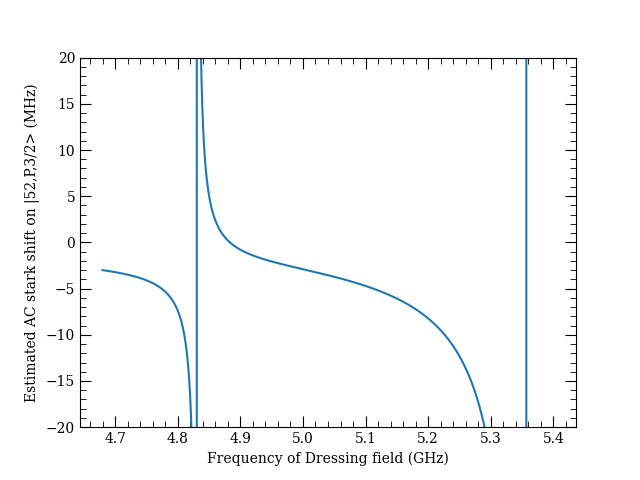

In [11]:
AC_stark_shifts = e_field_estimate_sq/hb**2 * AC_sum
fig,ax = plt.subplots(1,1)
ax.plot(field_freqs*1e-9/tau,AC_stark_shifts*1e-6/tau)
ax.set_ylabel(f"Estimated AC stark shift on {ryd1.ket()} (MHz)")
ax.set_xlabel(f"Frequency of Dressing field (GHz)")
ax.set_ylim(-20,20)
fig.show()

In [22]:
E_s = (5.4e9/(ryd1.atom.getReducedMatrixElementJ(ryd1.n,ryd1.l,ryd1.j,51,2,5/2)*e*ao/h))**2
print(10*np.log10(E_s/4))

31.80331270483828


In [30]:
quad_states = [
    RydStateFS(45,3,5/2),
    RydStateFS(46,3,5/2),
    RydStateFS(47,3,5/2),
    RydStateFS(48,3,5/2),
    RydStateFS(49,3,5/2),
    RydStateFS(50,3,5/2),
    RydStateFS(51,3,5/2),
]
print("\n".join(
    [f"detuning between {target_state.ket()} and {state.ket()} = {states_sgn(target_state,state)*detuning(target_state,state,0)*1e-9/tau}GHz" for state in quad_states]
))

detuning between |52,P,3/2> and |45,F,5/2> = -225.01064121393296GHz
detuning between |52,P,3/2> and |46,F,5/2> = -154.9899045607284GHz
detuning between |52,P,3/2> and |47,F,5/2> = -89.39392348124412GHz
detuning between |52,P,3/2> and |48,F,5/2> = -27.85759085827803GHz
detuning between |52,P,3/2> and |49,F,5/2> = 29.947304657218915GHz
detuning between |52,P,3/2> and |50,F,5/2> = 84.31646402806241GHz
detuning between |52,P,3/2> and |51,F,5/2> = 135.51686693366966GHz


In [12]:
help(Cesium().getQuadrupoleMatrixElement)

Help on method getQuadrupoleMatrixElement in module arc.alkali_atom_functions:

getQuadrupoleMatrixElement(n1, l1, j1, n2, l2, j2, s=0.5) method of arc.alkali_atom_data.Cesium instance
    Radial part of the quadrupole matrix element
    
    Calculates :math:`\int \mathbf{d}r~R_{n_1,l_1,j_1}(r)\cdot             R_{n_1,l_1,j_1}(r) \cdot r^4`.
    See `Quadrupole calculation example snippet`_  .
    
    .. _`Quadrupole calculation example snippet`:
        ./Rydberg_atoms_a_primer.html#Quadrupole-matrix-elements
    
    Args:
        n1 (int): principal quantum number of state 1
        l1 (int): orbital angular momentum of state 1
        j1 (float): total angular momentum of state 1
        n2 (int): principal quantum number of state 2
        l2 (int): orbital angular momentum of state 2
        j2 (float): total angular momentum of state 2
        s (float): optional, total spin angular momentum of state.
            By default 0.5 for Alkali atoms.
    
    Returns:
        float

In [16]:
e_state = RydStateFS(5,2,5/2)
nb_state = RydStateFS(5,2,3/2)
detuning(e_state,nb_state,0)*1e-9

18381.71727967295

In [19]:
dipoles[RydStateFS(51,2,3/2).__repr__()]*(1.63e2/hb)*1e-9

-23.715881165147998

In [2]:
Cesium().getEnergy(52,1,3/2)*e/h

-1402004231222.4731

In [15]:
ao*e

8.478353551956304e-30

In [3]:
cs = Cesium()
n_t = 52
l_t = 1
j_t = 3/2

n_p = 51
l_p = 2
j_p1 = 5/2
j_p2 = 3/2

def split(n1,l1,j1,n2,l2,j2):
    return (cs.getEnergy(n1,l1,j1) - cs.getEnergy(n2,l2,j2))*e/h*1e-9

print(f"Energy between |{n_t},{l_t},{int(2*j_t)}/2> and |{n_p},{l_p},{int(2*j_p1)}/2>  = {split(n_t,l_t,j_t,n_p,l_p,j_p1):.6f}GHz")
print(f"Energy between |{n_t},{l_t},{int(2*j_t)}/2> and |{n_p},{l_p},{int(2*j_p2)}/2>  = {split(n_t,l_t,j_t,n_p,l_p,j_p2):.6f}GHz")

print(f"FS dipole RME between |{n_t},{l_t},{int(2*j_t)}/2> and |{n_p},{l_p},{int(2*j_p1)}/2> = {cs.getReducedMatrixElementJ(n_t,l_t,j_t,n_p,l_p,j_p1):.6f} a0e")
print(f"FS dipole RME between |{n_t},{l_t},{int(2*j_t)}/2> and |{n_p},{l_p},{int(2*j_p2)}/2> = {cs.getReducedMatrixElementJ(n_t,l_t,j_t,n_p,l_p,j_p2):.6f} a0e")

Energy between |52,1,3/2> and |51,2,5/2>  = -5.356698GHz
Energy between |52,1,3/2> and |51,2,3/2>  = -4.830558GHz
FS dipole RME between |52,1,3/2> and |51,2,5/2> = -5421.789200 a0e
FS dipole RME between |52,1,3/2> and |51,2,3/2> = -1809.740444 a0e


In [7]:
print(f"E|51S1/2>-E|52P3/2> = {split(n_t,l_t,j_t,51,0,1/2)}GHz")
print(f"E|52S1/2>-E|52P3/2> = {split(n_t,l_t,j_t,52,0,1/2)}GHz")
print(f"E|50D3/2>-E|52P3/2> = {split(n_t,l_t,j_t,50,2,3/2)}GHz")
print(f"E|50D5/2>-E|52P3/2> = {split(n_t,l_t,j_t,50,2,5/2)}GHz")

print(f"E|53S1/2>-E|52P3/2> = {split(n_t,l_t,j_t,53,0,1/2)}GHz")
print(f"E|52D3/2>-E|52P3/2> = {split(n_t,l_t,j_t,52,2,3/2)}GHz")
print(f"E|52D5/2>-E|52P3/2> = {split(n_t,l_t,j_t,52,2,5/2)}GHz")


E|51S1/2>-E|52P3/2> = 90.41950306991947GHz
E|52S1/2>-E|52P3/2> = 28.819857649573347GHz
E|50D3/2>-E|52P3/2> = 54.58604710351759GHz
E|50D5/2>-E|52P3/2> = 54.02599810613592GHz
E|53S1/2>-E|52P3/2> = -29.043235935034918GHz
E|52D3/2>-E|52P3/2> = -60.68440347926503GHz
E|52D5/2>-E|52P3/2> = -61.179318512959256GHz


In [31]:
at.getEnergy(52,1,3/2)*e/h*1e-9

-1402.0042312224732

E|51S1/2>-E|52P3/2> = 90.41950306991947GHz
E|52S1/2>-E|52P3/2> = 28.819857649573347GHz
E|50D3/2>-E|52P3/2> = 54.58604710351759GHz
E|50D5/2>-E|52P3/2> = 54.02599810613592GHz
E|53S1/2>-E|52P3/2> = -29.043235935034918GHz
E|52D3/2>-E|52P3/2> = -60.68440347926503GHz
E|52D5/2>-E|52P3/2> = -61.179318512959256GHz

In [60]:
print(state_dipoles)

{'RydStateFS(n=52,l=0,j=0.5)': 2.569161175584878e-26, 'RydStateFS(n=53,l=0,j=0.5)': 2.5114780894912693e-26, 'RydStateFS(n=50,l=2,j=1.5)': -4.331284375667985e-27, 'RydStateFS(n=50,l=2,j=2.5)': -1.3417531837556534e-26, 'RydStateFS(n=51,l=2,j=1.5)': -1.5343619318353508e-26, 'RydStateFS(n=51,l=2,j=2.5)': -4.5967845723921525e-26, 'RydStateFS(n=52,l=2,j=1.5)': -2.3769437562218322e-27, 'RydStateFS(n=52,l=2,j=2.5)': -6.751316006523433e-27}


In [65]:
AC_sum * (1.6e-2/hb)**2

33211.86570377466

In [71]:
print(array(list(detunings.values())))

[2.40898576e+10 2.43132359e+10 4.98560471e+10 4.92959981e+10
 1.00557797e+08 6.26698349e+08 5.59544035e+10 5.64493185e+10]


In [74]:
detuning(ryd1,ryd2, field_freq)

8.195611714101614e+28

In [15]:
Ryd1.atom

NameError: name 'Ryd1' is not defined

In [ ]:
atom = Cesium()
atom.LevelPlo